### <b>실습환경 준비하기</b>

In [1]:
package_version(R.version)

[1] ‘4.3.0’

시계열 분석에 사용할 R 라이브러리(패키지)

- `ts`: 시계열 데이터의 전처리
- `tseries`: 시계열 데이터의 시각화
- `TSA`: 시계열 데이터 불러오기 
- `forecast`: 시계열 예측과 검정

In [2]:
install.packages('forecast')
install.packages('TSA')
library(forecast)
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




### <b>간단한 시계열 데이터 만들기</b>

In [ ]:
help(ts)

In [ ]:
## `ts` 라이브러리 Syntax 예시 (# 시계열 데이터 만들기)
# ts(data =  , start = 1, end = numeric(), frequency = 1, deltat = 1, ts.eps= get(Option('ts.eps')), class = , names = )
# as.ts(x, ...)
# is.ts(x)

In [ ]:
# 시계열 데이터 만들기
ts(1:10, frequency = 4, start=c(2021, 2)) 

,Qtr1,Qtr2,Qtr3,Qtr4
2021,,1,2,3
2022,4,5,6,7
2023,8,9,10,


In [ ]:
# 값의 범위는 1부터 10까지
# `frequency` : 1년을 4로 나눈 분기자료
# `start` : 시작은 2021년 2분기, 종료는 값이 끝나는 시점

In [ ]:
ts(1:10, f=4, s=c(2021, 2)) # 빠르게

,Qtr1,Qtr2,Qtr3,Qtr4
2021,,1,2,3
2022,4,5,6,7
2023,8,9,10,


In [ ]:
dd <- matrix( c(1342, 1442, 1252, 1343, 	
                1425, 1362, 1256, 1272,
	              1243, 1359, 1412, 1253,					
                1201, 1478, 1322, 1406,
                1254, 1289, 1497, 1208))
dd.ts <- ts(data=dd, start=c(2016, 1), frequency=4) # 시계열로 인식시켜주기 위해서 사용 
dd.ts   

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


### <b>시계열 데이터의 주요 형태</b>

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


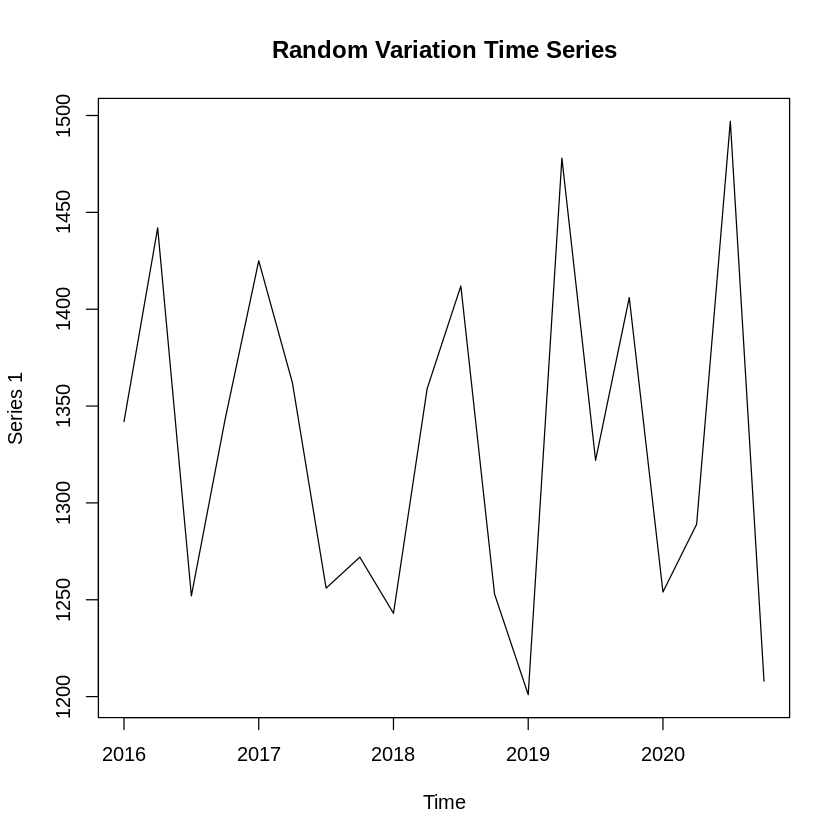

In [ ]:
## 우연변동 시계열 : 랜덤하다. 미니멈값과 맥시멈값이 차이가 많이나고, 추세, 경향성도 보이지않음. 
# 예시 : 주기를 타지 않는 제품의 생산량/판매량, 짧은 기간의 주가 데이터, 금리 
random1 = matrix( c(1342, 1442, 1252, 1343, 	
                    1425, 1362, 1256, 1272,                  
                    1243, 1359, 1412, 1253,					
                    1201, 1478, 1322, 1406,
                    1254, 1289, 1497, 1208) )

random1.ts = ts(data=random1, start=c(2016, 1), frequency = 4)
random1.ts
plot(random1.ts, main = 'Random Variation Time Series')

In [ ]:
# 예시: 주기를 타지 않는 제품의 생산량, 판매량 데이터, 짧은 기간의 주가 데이터, 금리 등

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1125,1262,1456,1572
2018,1143,1269,1462,1553
2019,1121,1258,1472,1546
2020,1154,1249,1477,1548


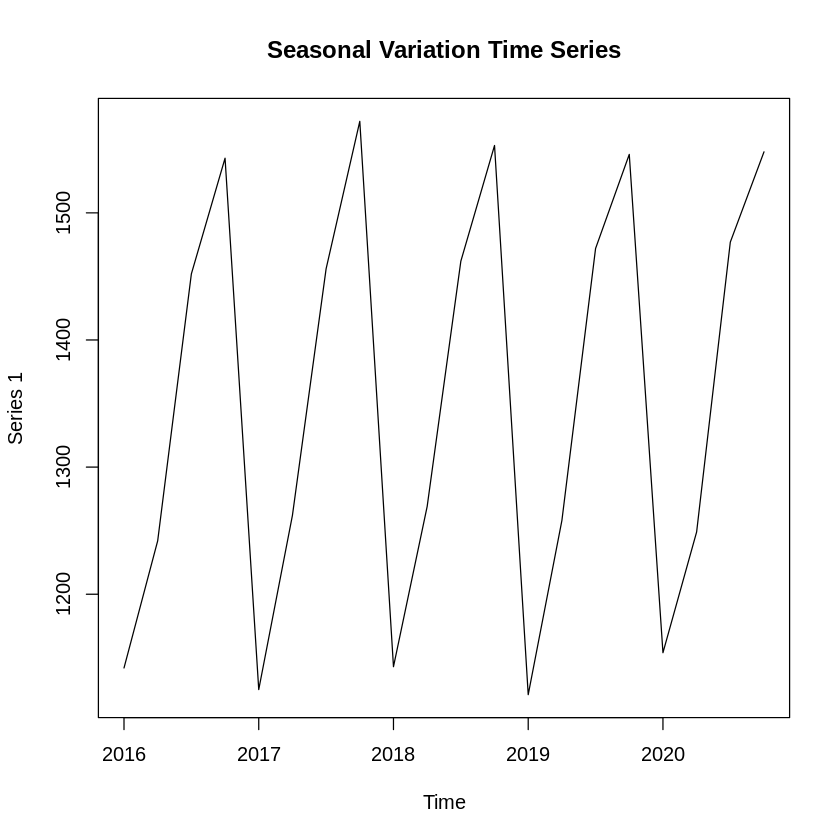

In [ ]:
## 계절변동 시계열 (seasonality 계절) 
# 주기성을 가지고 있음. 반복되는 패턴이 있다. 
season1.ts <- ts(data=season1 <- matrix(c(1142, 1242, 1452, 1543, 
                                          1125, 1262, 1456, 1572, 
                                          1143, 1269, 1462, 1553, 
                                          1121, 1258, 1472, 1546, 
                                          1154, 1249, 1477, 1548)), s=c(2016, 1), f=4)
season1.ts
plot(season1.ts, main = 'Seasonal Variation Time Series')

In [ ]:
# 예시: 강수량, 적설량, 아이스크림 판매 추이, 전력 소비량, 성숙한 플랫폼의 데일리 트래픽 등

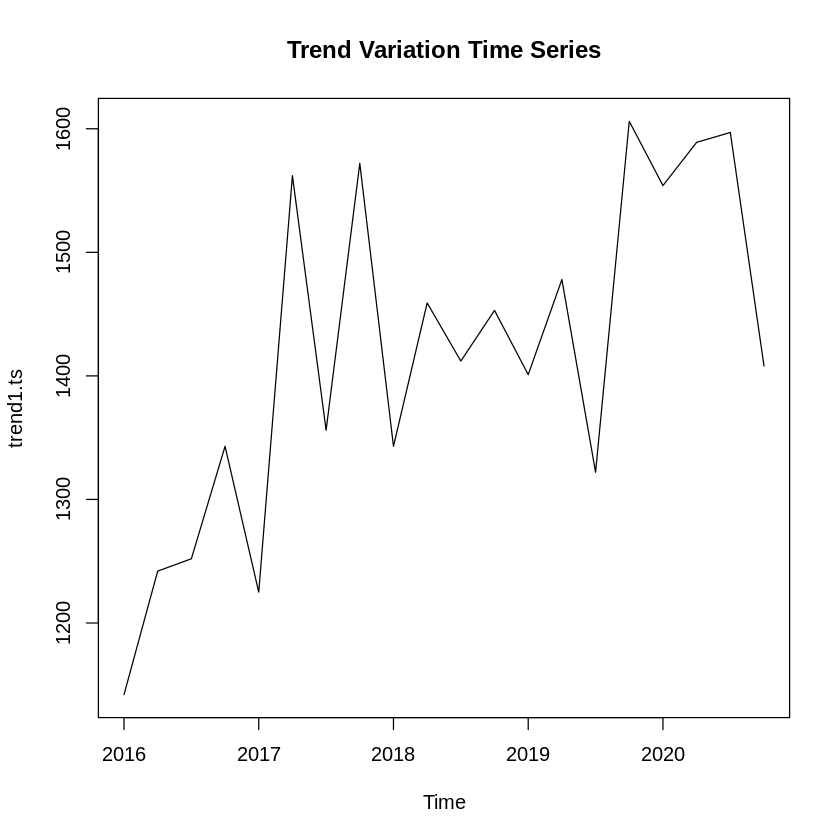

In [ ]:
## 추세변동 시계열
# 최저점이 이어지는 경우 , 그림을 보면 점진적인 우상향이있음, 변동이 심하자만.
trend1.ts <- ts(trend1 <- c(1142, 1242, 1252, 1343, 
                            1225, 1562, 1356, 1572, 
                            1343, 1459, 1412, 1453, 
                            1401, 1478, 1322, 1606, 
                            1554, 1589, 1597, 1408), c(2016, 1), f=4)
plot(trend1.ts, main = 'Trend Variation Time Series')

In [ ]:
# 예시: 물가 데이터, 희소 원자재 가격 데이터, 대부분의 주가지수 데이터

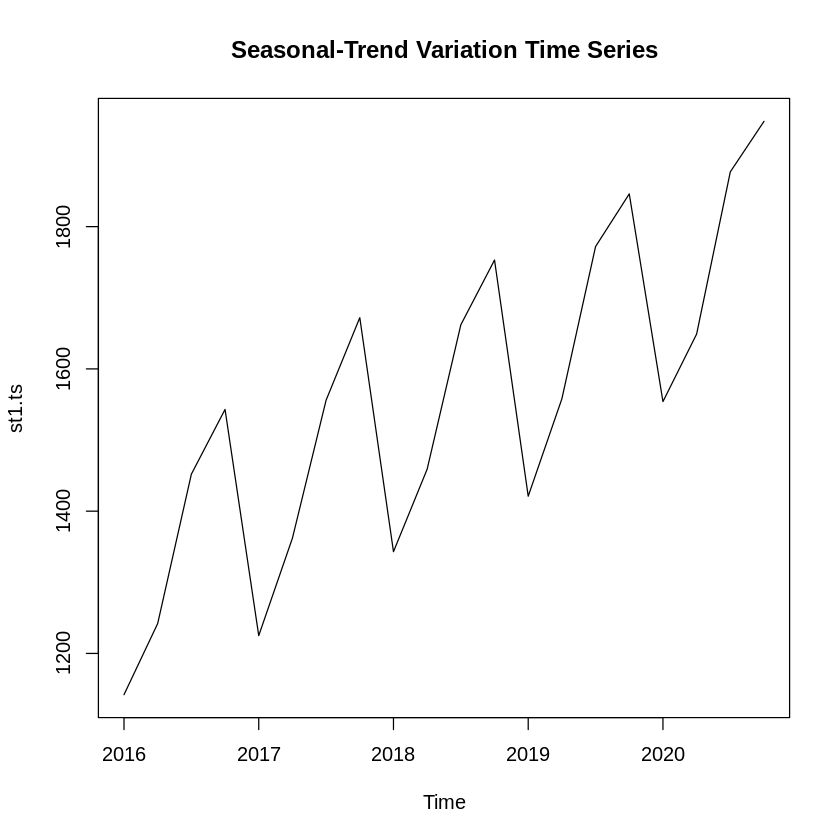

In [ ]:
## 계절적 추세변동 시계열
# 보통 트렌드가 있는 경우에 계절적인 변동이 같이 있는 경우가 많다. 
# 이런 경우가 다루기 편할 수도 있음. 일정한 변동이 있기 때문이다.
st1.ts <- ts(data = st1 <- c(1142, 1242, 1452, 1543, 
                             1225, 1362, 1556, 1672, 
                             1343, 1459, 1662, 1753, 
                             1421, 1558, 1772, 1846, 
                             1554, 1649, 1877, 1948), c(2016, 1), f=4)
plot(st1.ts, main = 'Seasonal-Trend Variation Time Series')

In [ ]:
# 예시 : 대부분의 판매량, 사회/과학적 현상

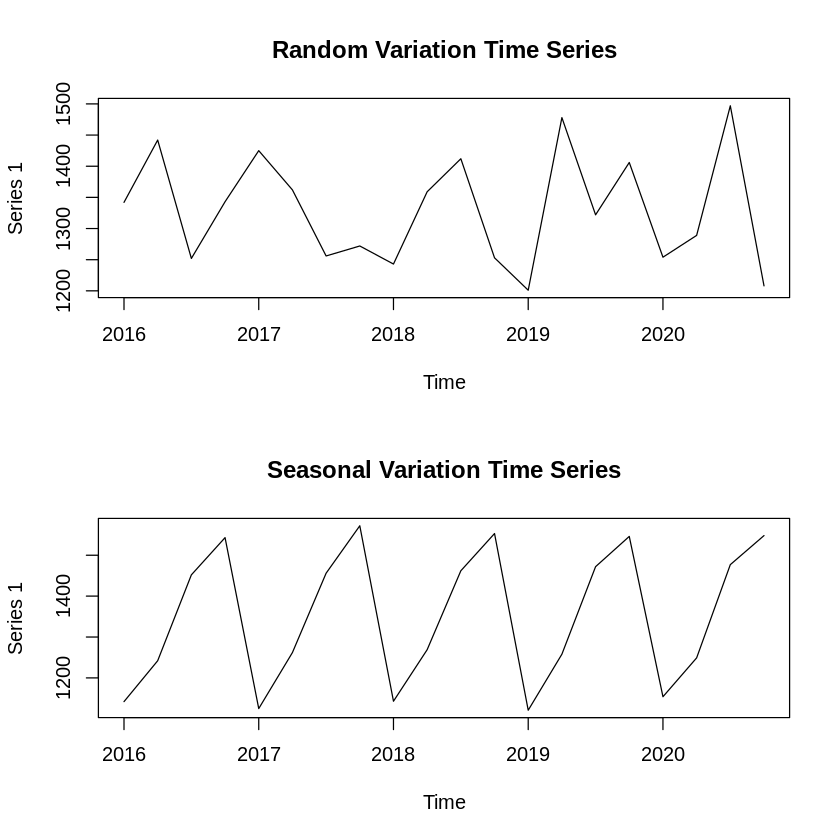

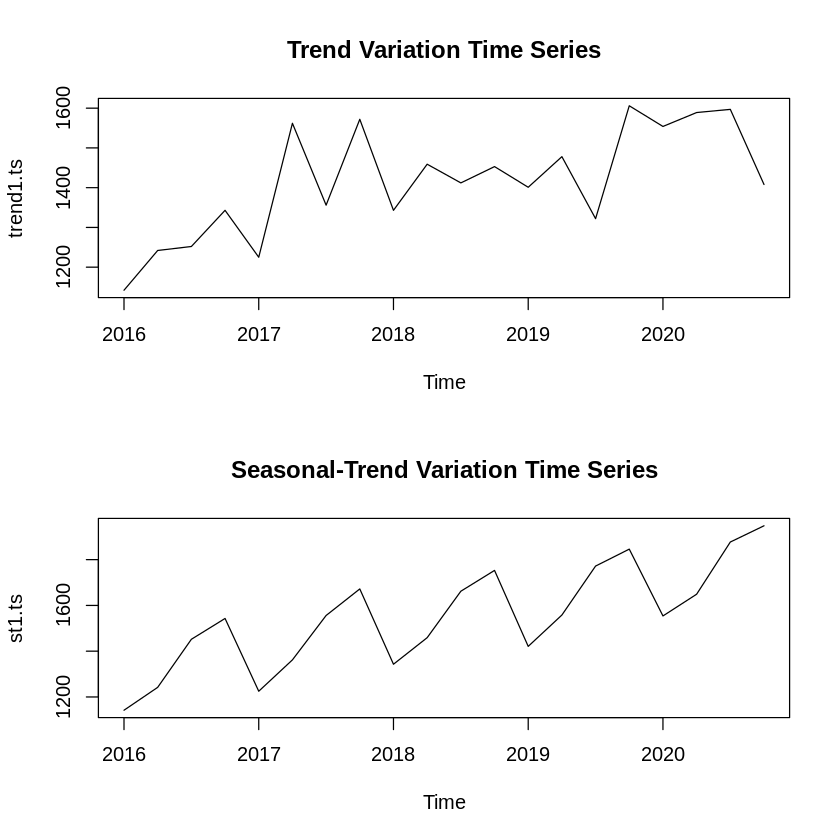

In [ ]:
par(mfrow = c(2,1))
plot(random1.ts, main = 'Random Variation Time Series')
plot(season1.ts, main = 'Seasonal Variation Time Series')
plot(trend1.ts, main = 'Trend Variation Time Series')
plot(st1.ts, main = 'Seasonal-Trend Variation Time Series')

### <b>시계열 데이터의 시각화</b>

In [ ]:
# Month Plot ex) 년도마다 있는 월별(5월)로

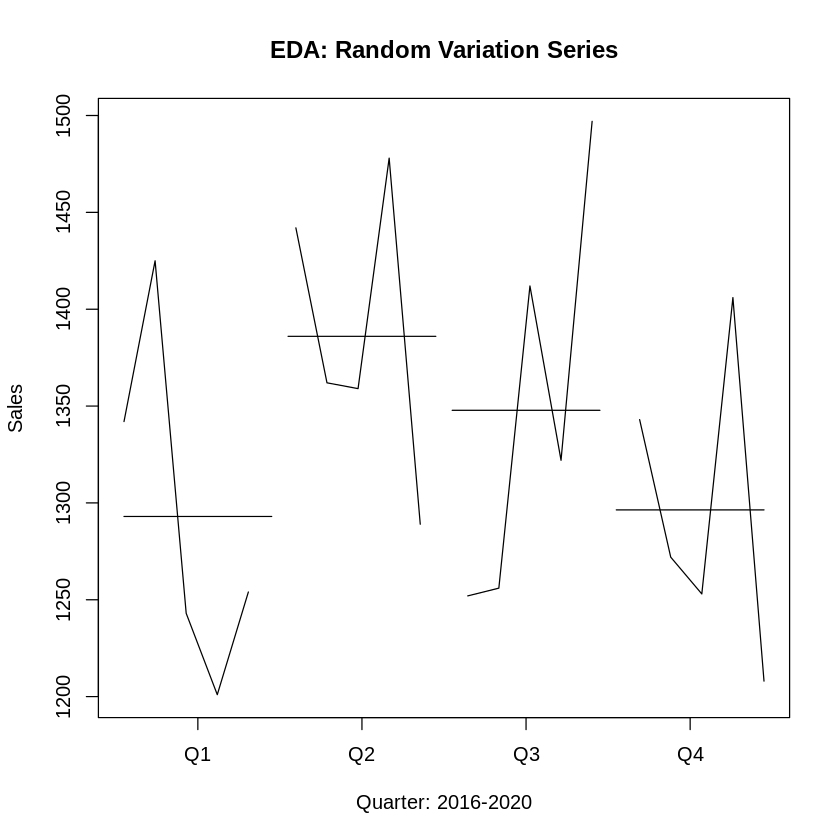

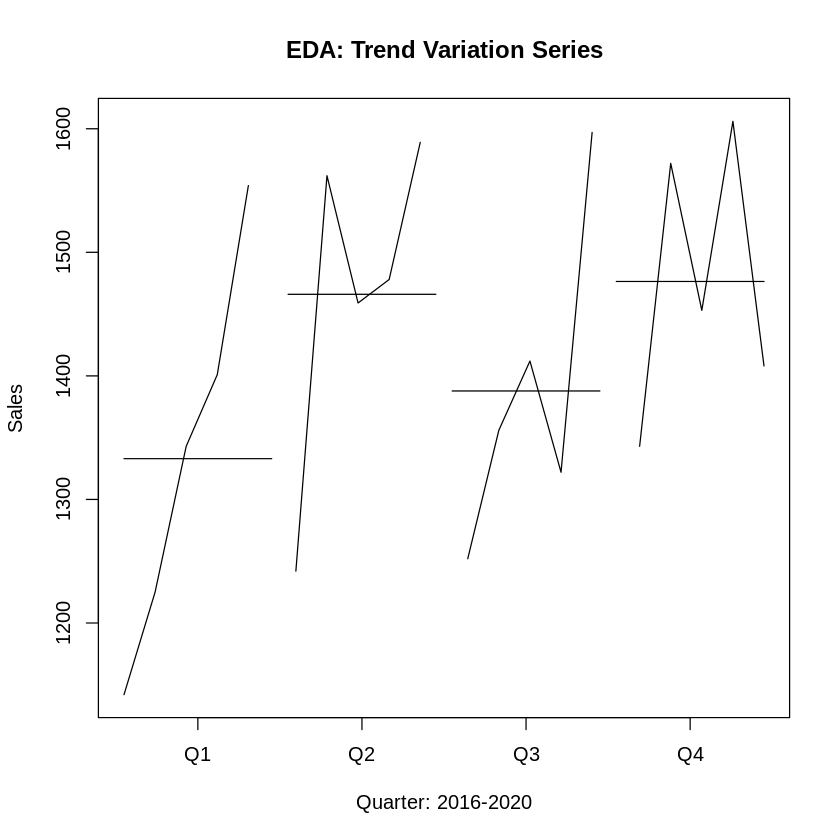

In [ ]:
monthplot(random1.ts, main="EDA: Random Variation Series", xlab="Quarter: 2016-2020", ylab="Sales") # 분기별로 모은 값 
# 별로 패턴이 없다. 평균값도 너무나 우연적이다.
monthplot(trend1.ts, main="EDA: Trend Variation Series", xlab="Quarter: 2016-2020", ylab="Sales") # 횡으로 그려진 직선은 평균값
# 매년 병동은 다르지만 연초에는 우상향이고 연 중간에는 알수없는 값을 보인다. 
# 연말에는 스파이크가 있을것이라 보인다. 

# 그림을 뛰었을 때 숫자만으로 알수 없는 것들을 볼 수 있다.

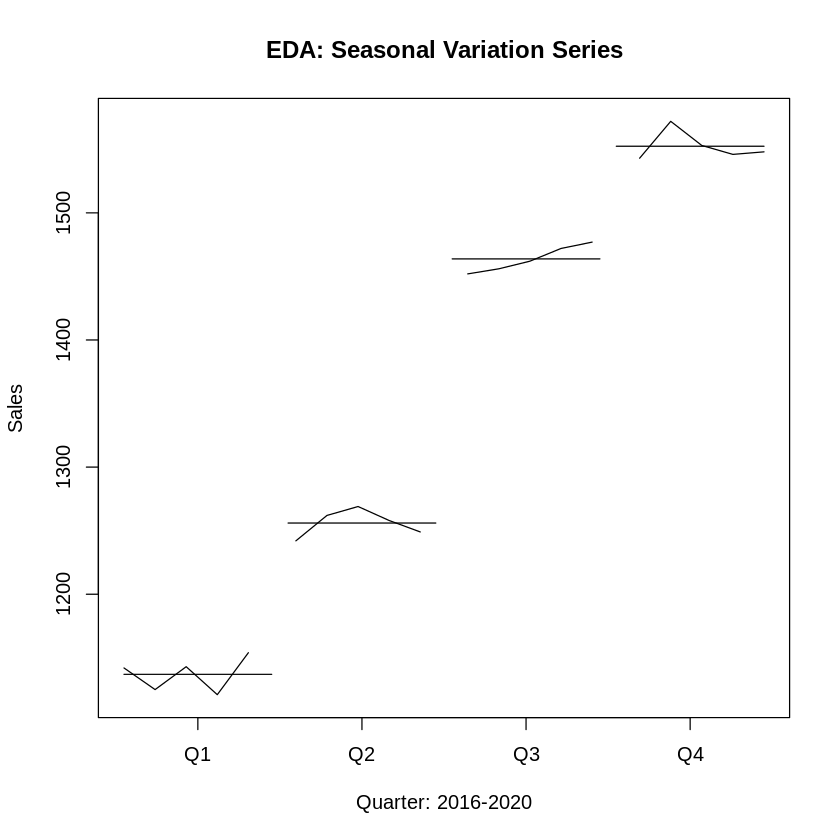

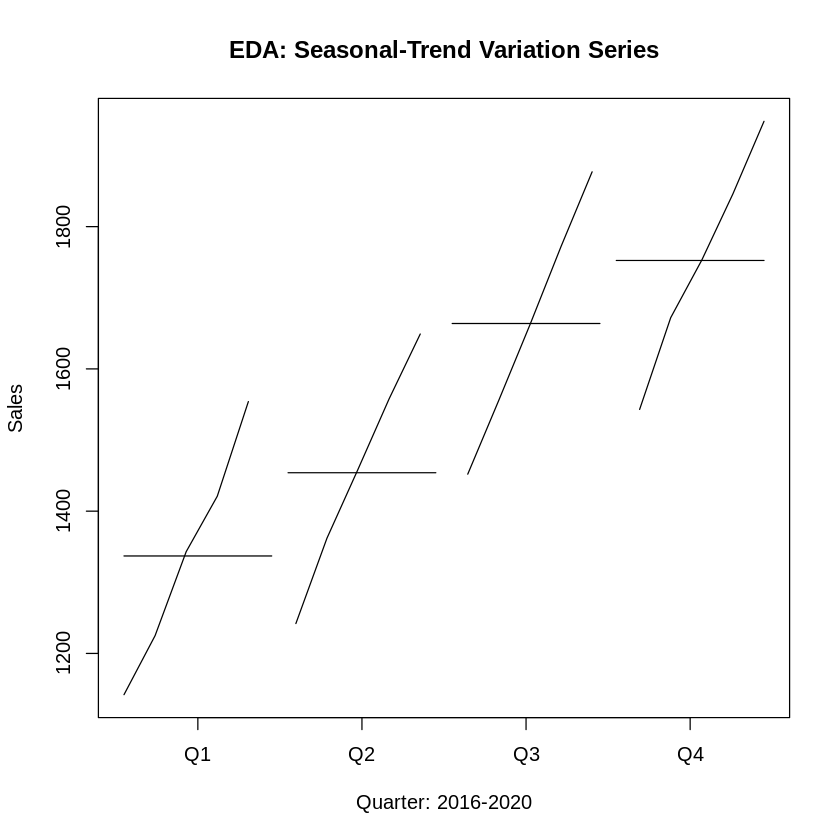

In [ ]:
monthplot(season1.ts, main="EDA: Seasonal Variation Series", xlab="Quarter: 2016-2020", ylab="Sales") # 분기별로 모은 값
# 분기별로 패턴은 알 수 없지만, 하지만 대충 값이 매년 비슷하다. 
# 즉, 따라서 매년 분기별로 값이 올라가지만(트렌드), 분기 내부적으로는 값이 비슷하다. 

monthplot(st1.ts, main="EDA: Seasonal-Trend Variation Series", xlab="Quarter: 2016-2020", ylab="Sales") # 횡으로 그려진 직선은 평균값
# 추세가 아주 일정하다(매년 값이 올라간다). 매출이면 아주 좋다. 주가/부동산이면 쉽지 않다. 

In [ ]:
# Seaonsonal 요소 제외한 시각화

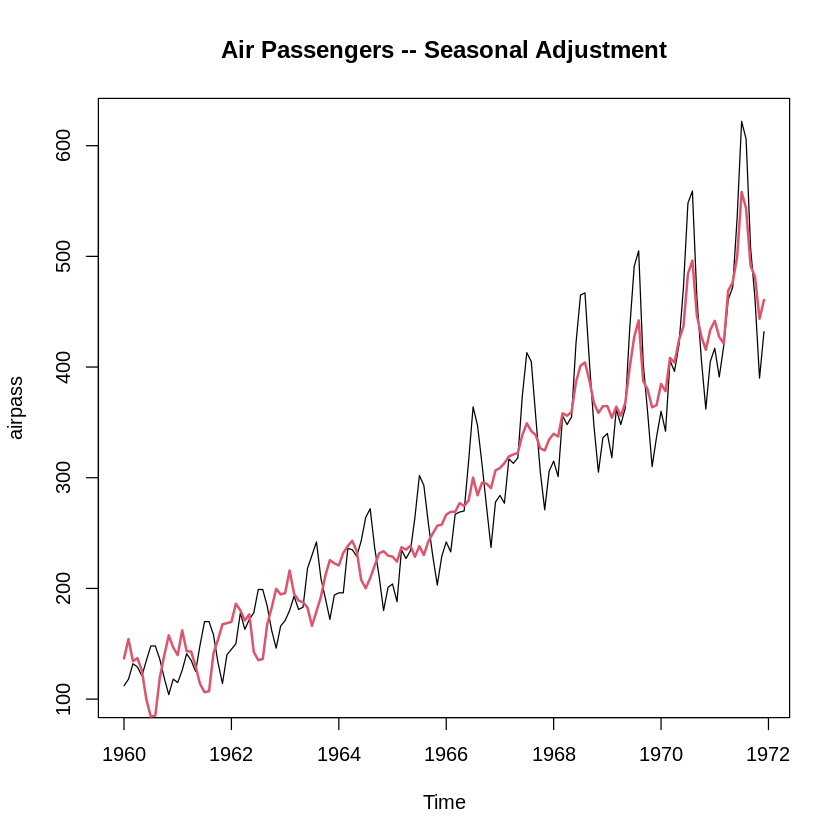

In [5]:
data(airpass)
plot(airpass, main = 'Air Passengers -- Seasonal Adjustment') # 계절적이 변동을 제외하고 보여줘 
lines(seasadj(decompose(airpass)), col=2, lwd=2)
# 우상향 하고 데이터의 변동이 시간에 따라 점점 커진다.

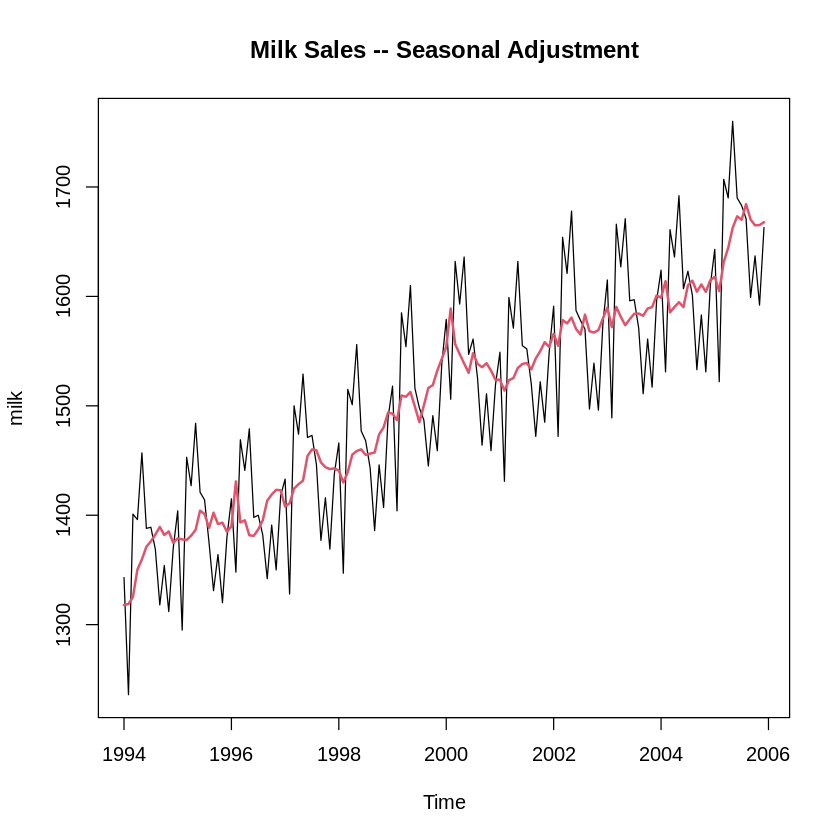

In [6]:
data(milk)
plot(milk, main='Milk Sales -- Seasonal Adjustment') 
lines (seasadj(decompose(milk)), col=2, lwd=2) # 빨간 곡선 
# 우상향하고, 거의 랜덤 변동, 변동의 폭이 넓지 않고 일정하다.
# seasonality를 제외하면 굉장히 일정한 추세를 보인다.

In [ ]:
# Seasonal Plot 
# seasonality를 보고싶을 때

In [ ]:
install.packages('TSA')
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



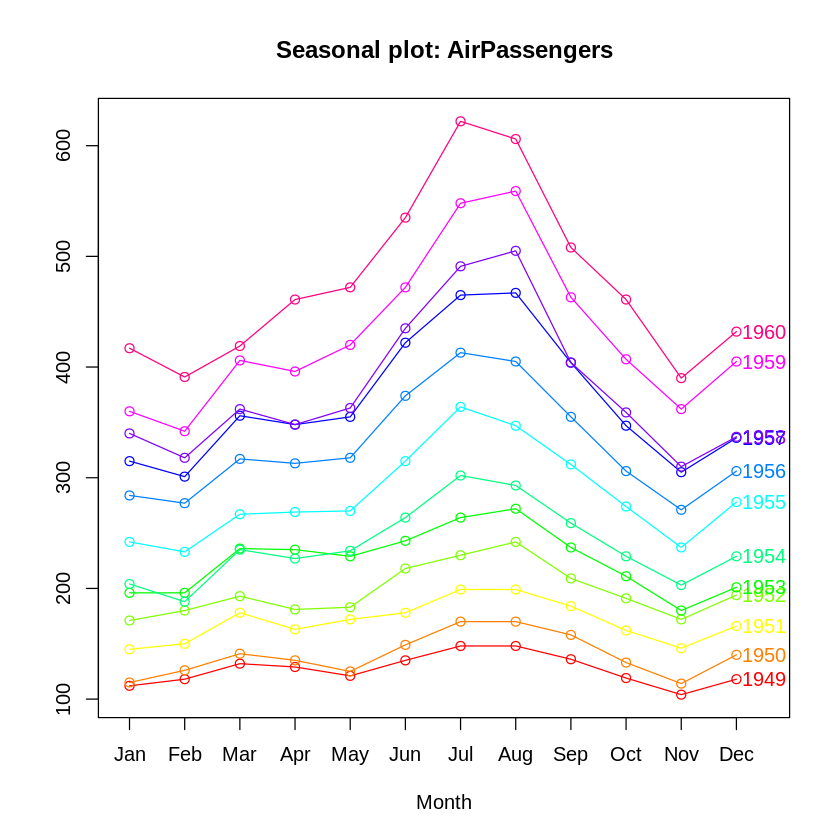

In [ ]:
seasonplot(AirPassengers, col=rainbow(12), year.labels=TRUE)
# 비행기를 타는 사람이 많이 늘어났다.
# 년마다는 매년마다 사람이 증가했고, 월별로봤을 때는 계절적인 변동도 늘어났다(변동폭이 커지고 있다).  
# 월 평균으로 봤을 때 이러한 증가세의 주요한 원인은 계절적 변동이 발생하는 7,8월의 사람들 때문이다.  
# 월별로 발생하는 sesonal 변동이 승객의 증가를 impact 했다. 

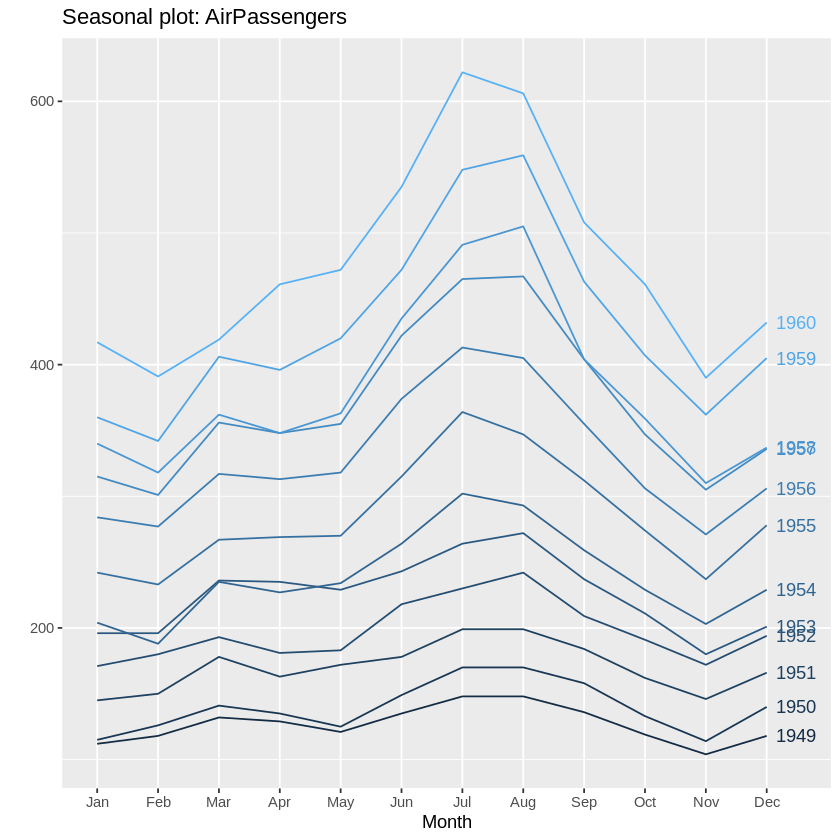

In [ ]:
ggseasonplot(AirPassengers, year.labels=TRUE, continuous = TRUE)

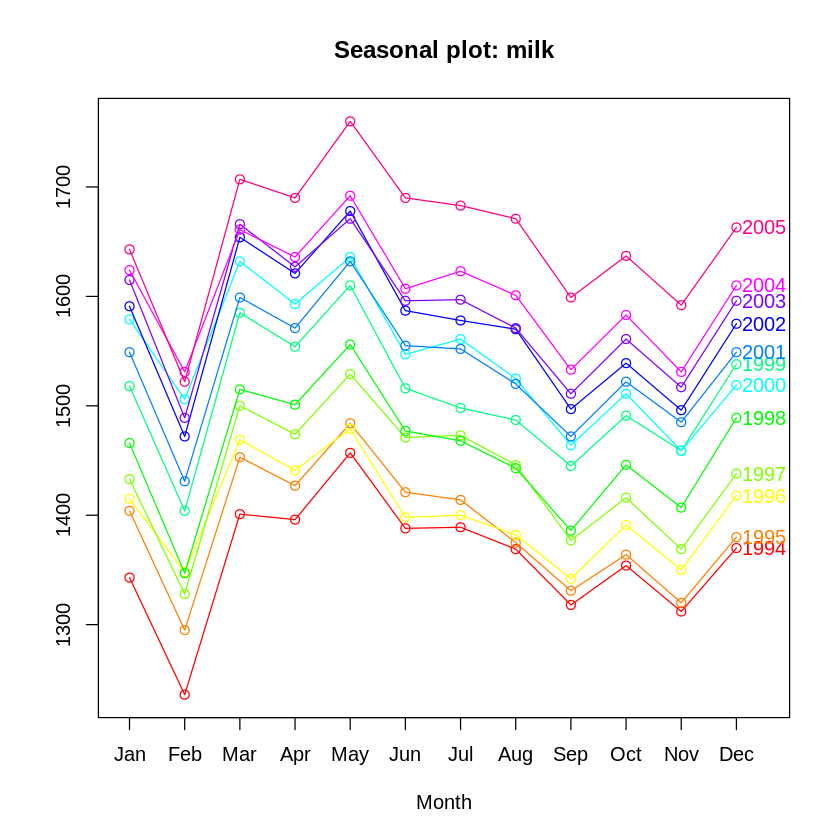

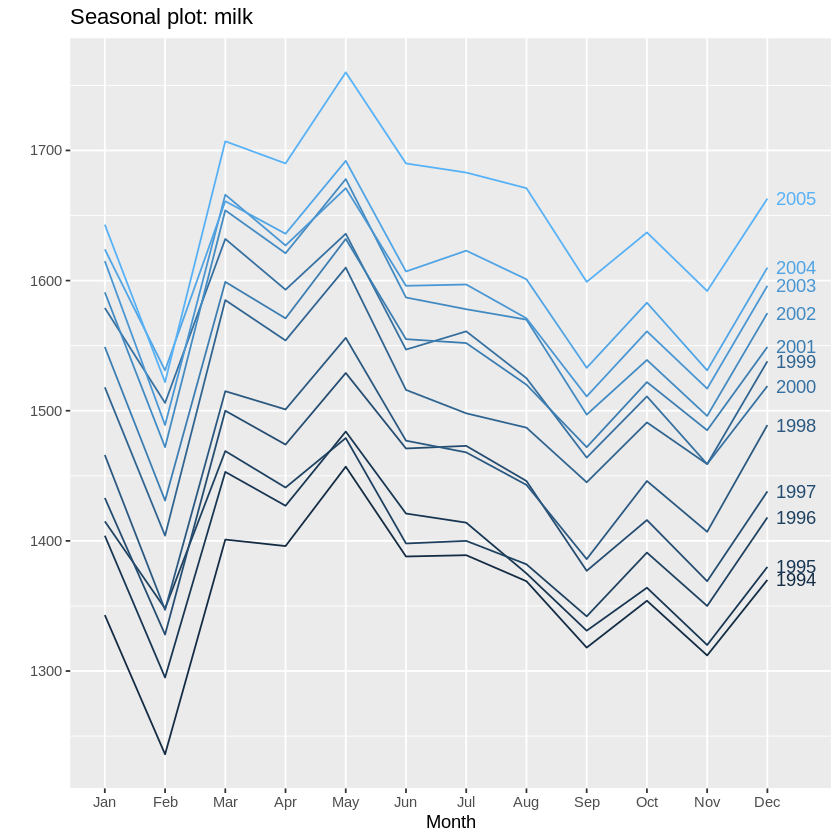

In [ ]:
seasonplot(milk, col=rainbow(12), year.labels=TRUE)
ggseasonplot(milk, year.labels=TRUE, continuous = TRUE)
# 매년 증가하는 폭(계절적 변동)이 일정하다가 최근 증가하는 폭이 늘었고, 매년 추세는 증가한다.